## Pandas는 데이터 분석시 사용하는 패키지이다. 여기서 가장 중요한 두 가지 객체는 Series와 DataFrame이다. 

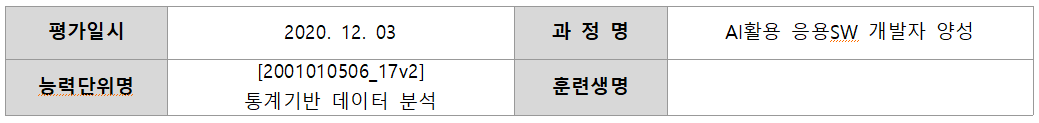

In [93]:
from IPython.display import Image
Image("picture.png") 

In [1]:
import pandas as pd
import numpy as np

s= pd.Series([1,2,3,np.nan])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

### Series는 배열(array)과 똑같이 생겼다.
1차원이며 index를 가지고 있으나 DataFrame은 다르다


In [2]:
data = pd.date_range('20201106',periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=data, columns=list('ABCD'))
df

,A,B,C,D
2020-11-06,-0.373911,-1.377443,1.692235,-0.383300
2020-11-07,-0.336186,0.486250,-0.731724,-1.025852
2020-11-08,0.611633,2.570780,0.334811,-0.503636
2020-11-09,0.249497,1.037333,0.547425,-0.834447
2020-11-10,0.173263,0.098393,-1.085346,0.474136
2020-11-11,-1.044125,0.414972,-1.814653,0.010049


### DataFrame 객체는 엑셀 시트 혹은 테이블 형태이다. 그룹핑하거나 계산을 할 수 있으며 columns와 index로 나눌 수 있다.

#### www.kaggle.com에 올라온 Competition 문제 중 https://www.kaggle.com/c/titanic 에서 train.csv 파일 다운로드. 침몰한 타이타닉호 

In [8]:
import pandas as pd
from pandas import Series, DataFrame

file_path = '../data/train.csv'
titanic_df = pd.read_csv(file_path)


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 질문1. 타이타닉호에 승선했던 승객은 누구인가?

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


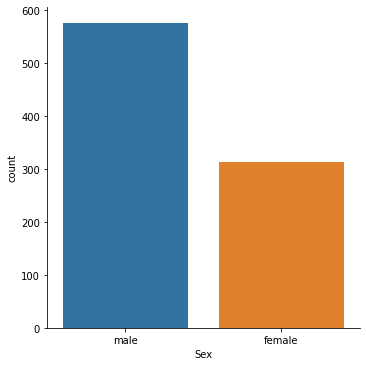

In [16]:
sns.factorplot('Sex', kind='count', data=titanic_df)

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


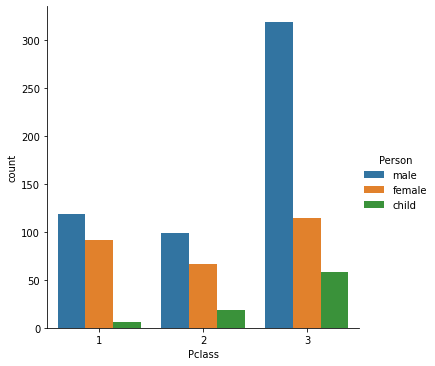

In [29]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df[titanic_df['Age']<16].head()


sns.factorplot('Pclass', kind='count', data=titanic_df, hue='person', order=[1,2,3])

<AxesSubplot:>

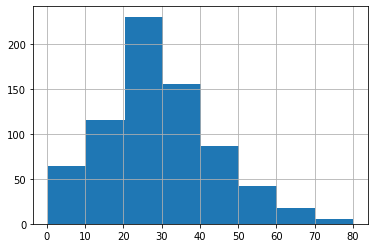

In [36]:
titanic_df['Age'].hist(bins=8)
    

In [38]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

### 질문2. 승객들은 어떤 deck에 있었으며 class와 어떤 관계가 있는가?
Dec는 짐을 어디에 풀 것인지를 말해주는 cabin 컬럼에 정보가 있다.
그런데 데이터가 없는 것을 제거 해야 하고 첫번째 문자만 가져와서 새로운 객체를 만들어야 한다. 

In [40]:
deck = titanic_df['Cabin'].dropna()
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [44]:
## 첫번째 문자만 담는다.
levels = []
for level in deck:
    levels.append(level[0])



In [49]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


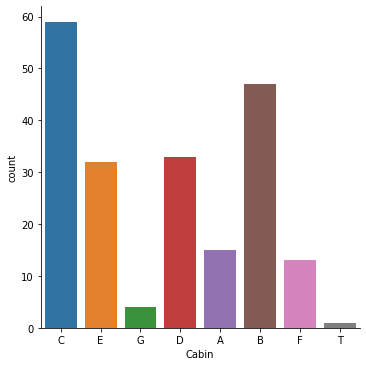

In [50]:
sns.factorplot('Cabin',kind='count',data=cabin_df)

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


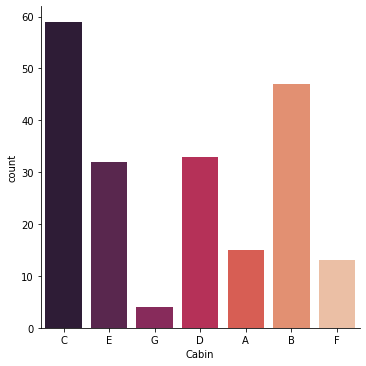

In [55]:
cabin_df = cabin_df[cabin_df.Cabin !='T']
sns.factorplot('Cabin', kind='count', data=cabin_df, palette='rocket')

### 질문3. 어떤 요소가 승객들을 생존하게 만들었을까?
침몰한 타이타닉호에서도 어떤 요소가 생존 확률을 높였는지 분석.
생존한 승객의 정보는 Survive에 0과 1로 표기됨.

In [88]:
#Survived 컬럼에서 map이라는 함수를 이용해 특정 정보일 경우, 특정 값으로 매핑을 해준다.

titanic_df['survivor'] = titanic_df.Survived.map({0:"no", 1:"yes"})
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Person,survivor,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male,no,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,yes,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,yes,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,no,No


C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     549
Yes    342
Name: Survivor, dtype: int64

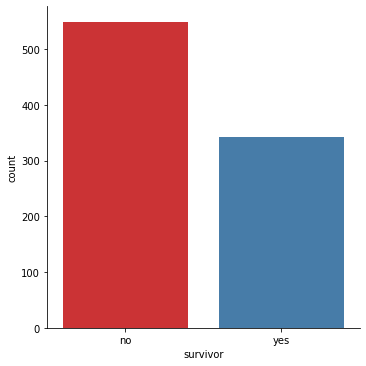

In [90]:
# 생존자는 몇명인지 그래프로 확인

sns.factorplot('survivor', kind='count', data=titanic_df, palette='Set1')
titanic_df['Survivor'].value_counts()

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


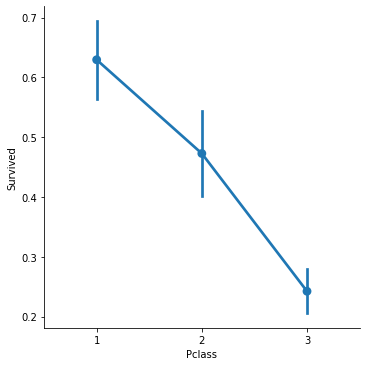

In [84]:
# 생존 확률에 어떤 요소가 작용했을지 알아보기 위해 먼저 Pclass를 살펴보자.
# 3등급 승객들의 생존율이 1, 2등급에 비해 현저히 낮음을 알 수 있다.

sns.factorplot('Pclass','Survived', data=titanic_df, order=[1,2,3])

In [ ]:
# 2, 3등급의 남성 승객의 생존율에는 큰 차이가 없음을 알 수 있다. 
# 어린이 승객의 생존율 또한 1등급보다 2등급이 오히려 더 높다.
# 그러나 여성과 어린이의 경우 3등급 승객의 생존율은 확연하게 낮다.

# 간단히 살펴본 위 분석을 통해 확실히 3등급 보다는 
# 1등급 승객들이 위험에 처했을 때 생존할 확률이 높다는 것을 알 수 있다.

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


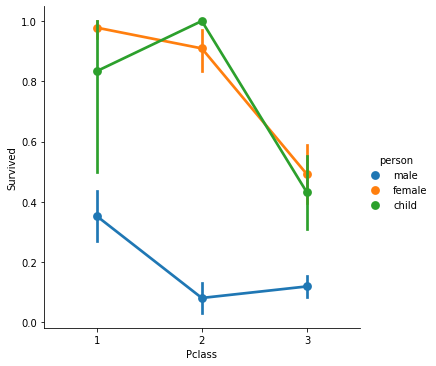

In [85]:
sns.factorplot('Pclass','Survived', data=titanic_df, hue = 'person', order=[1,2,3])

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


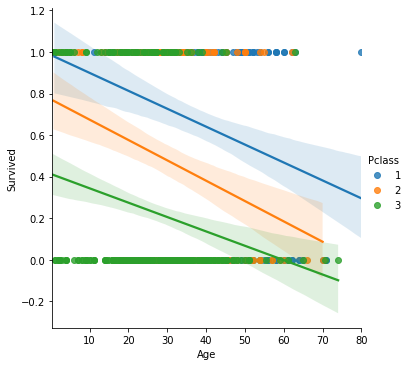

In [86]:
# 그렇다면 나이와의 상관관계는 어떻게 될까?

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass')

C:\Users\IT-5C\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


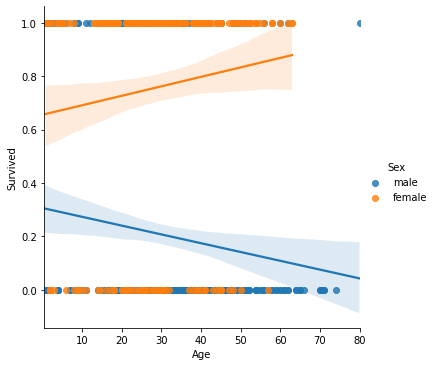

In [87]:
# 그렇다면 성별과의 상관관계는 어떻게 될까?

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

In [ ]:
# 여성은 나이가 많을 수록 생존율이 높고, 남성은 나이가 많을 수록 생존율이 낮다.